# HSE 2019 ML (bachelors 3rd course)
## Homework #1
### Student: Igor Tukh

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from collections import defaultdict
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import MinMaxScaler

In [244]:
DATASETS_DIR = 'datasets'
DATASETS = ['cancer.csv', 'spam.csv', 'blobs.csv']

In [245]:
def load_csv_dataset(dataset_path, label_name='label'):
    if label_name is not None:
        dataset = pd.read_csv(dataset_path)
        data_columns = np.array([name for name in dataset.columns if name != label_name])
        return dataset[label_name], dataset[data_columns]
    else:
        return pd.read_csv(dataset_path)

#### 1) (8 points) Implement the kNN algorithm and calculate Leave-one-out error on both datasets for 1 to 10 neighbors.


In [246]:
def get_k_nearest_indexes(from_point, to_points, k):
    dist_square = lambda x: np.linalg.norm(from_point - x)
    dists = np.array([dist_square(point) for point in to_points])
    return dists.argsort(kind='mergesort')[:k]

In [247]:
def kNN(point, points, points_labels, k, nearest_neighbors=None):
    affinities = defaultdict(lambda:0)
    nearest_neighbors = get_k_nearest_indexes(point, points, k) if nearest_neighbors is None else nearest_neighbors[:k]
    for neighbor_ind in nearest_neighbors:
        affinities[points_labels[neighbor_ind]] += 1
    result_label = None
    max_label_value = 0
    for label, value in affinities.items():
        if max_label_value < value:
            result_label = label
            max_label_value = value
    return result_label 

In [248]:
def get_LOO(dataset_path, max_k, scale=False):
    labels, data = load_csv_dataset(dataset_path)
    if scale:
        index = data.index
        columns = data.columns
        scaler = MinMaxScaler()
        data = pd.DataFrame(data = scaler.fit_transform(data), index=index, columns=columns)
    LOO = defaultdict(lambda:0)
    dataset_len = labels.shape[0]
    for ind in tqdm(range(dataset_len)):
        points_labels = pd.concat([labels[:ind], labels[ind+1:]]).to_numpy()
        points = pd.concat([data[:ind], data[ind+1:]]).to_numpy()
        point = data.iloc[ind].to_numpy()
        label = labels.iloc[ind]
        nearest_neighbors = get_k_nearest_indexes(point, points, max_k)
        for k in reversed(range(1, max_k + 1)):
            kNN_label = kNN(point, points, points_labels, k, nearest_neighbors)
            if kNN_label != label:
                LOO[k] += 1
    for k in range(1, max_k + 1):
        LOO[k] = 1.0 * LOO[k] / dataset_len
        print('dataset {}: k = {}, LOO = {}'.format(dataset_path, k, 1.0 * LOO[k]))
    return LOO

In [249]:
results = []

In [250]:
for dataset in DATASETS[:2]:
    results.append((dataset, get_LOO(os.path.join(DATASETS_DIR, dataset), 10)))

dataset datasets/cancer.csv: k = 1, LOO = 0.0843585237258348
dataset datasets/cancer.csv: k = 2, LOO = 0.0843585237258348
dataset datasets/cancer.csv: k = 3, LOO = 0.07381370826010544
dataset datasets/cancer.csv: k = 4, LOO = 0.07381370826010544
dataset datasets/cancer.csv: k = 5, LOO = 0.06678383128295255
dataset datasets/cancer.csv: k = 6, LOO = 0.070298769771529
dataset datasets/cancer.csv: k = 7, LOO = 0.06854130052724078
dataset datasets/cancer.csv: k = 8, LOO = 0.06854130052724078
dataset datasets/cancer.csv: k = 9, LOO = 0.06678383128295255
dataset datasets/cancer.csv: k = 10, LOO = 0.06854130052724078


dataset datasets/spam.csv: k = 1, LOO = 0.16952836339926103
dataset datasets/spam.csv: k = 2, LOO = 0.16952836339926103
dataset datasets/spam.csv: k = 3, LOO = 0.18517713540534667
dataset datasets/spam.csv: k = 4, LOO = 0.17344055640078243
dataset datasets/spam.csv: k = 5, LOO = 0.1858291675722669
dataset datasets/spam.csv: k = 6, LOO = 0.1767007172353836
dataset datasets/spam.csv: k = 7, LOO = 0.1958269941317105
dataset datasets/spam.csv: k = 8, LOO = 0.18235166268202566
dataset datasets/spam.csv: k = 9, LOO = 0.202782003912193
dataset datasets/spam.csv: k = 10, LOO = 0.18713323190610737


#### 2) (2 points) Scale all features with MinMax scaler to [0,1] and calculate Leave-one-out error on both datasets for 1 to 10 neighbors.

The task statementd doesn't say that we have to implement MinMaxScaler, so I'll use one from `sklearn`

In [10]:
for dataset in DATASETS[:2]:
    results.append((dataset, get_LOO(os.path.join(DATASETS_DIR, dataset), 10, scale=True)))


dataset datasets/cancer.csv: k = 1, LOO = 0.04745166959578207
dataset datasets/cancer.csv: k = 2, LOO = 0.04745166959578207
dataset datasets/cancer.csv: k = 3, LOO = 0.029876977152899824
dataset datasets/cancer.csv: k = 4, LOO = 0.028119507908611598
dataset datasets/cancer.csv: k = 5, LOO = 0.033391915641476276
dataset datasets/cancer.csv: k = 6, LOO = 0.03163444639718805
dataset datasets/cancer.csv: k = 7, LOO = 0.029876977152899824
dataset datasets/cancer.csv: k = 8, LOO = 0.029876977152899824
dataset datasets/cancer.csv: k = 9, LOO = 0.029876977152899824
dataset datasets/cancer.csv: k = 10, LOO = 0.026362038664323375


/Users/itukh/miniconda3/envs/py37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)



dataset datasets/spam.csv: k = 1, LOO = 0.08758965442295154
dataset datasets/spam.csv: k = 2, LOO = 0.08758965442295154
dataset datasets/spam.csv: k = 3, LOO = 0.09476200825907412
dataset datasets/spam.csv: k = 4, LOO = 0.08911106281243208
dataset datasets/spam.csv: k = 5, LOO = 0.09519669637035427
dataset datasets/spam.csv: k = 6, LOO = 0.08911106281243208
dataset datasets/spam.csv: k = 7, LOO = 0.09932623342751576
dataset datasets/spam.csv: k = 8, LOO = 0.09063247120191263
dataset datasets/spam.csv: k = 9, LOO = 0.1019343620951967
dataset datasets/spam.csv: k = 10, LOO = 0.0969354488154749


And finally, let's see plots

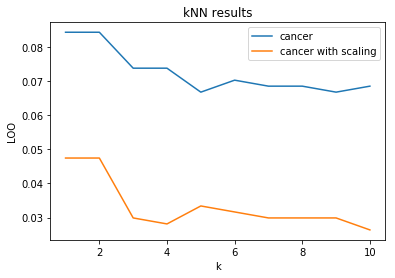

In [12]:
plt.clf()
plt.xlabel('k')
plt.ylabel('LOO')
plt.title('kNN results')
ks = list(range(1, 11))
plt.plot(ks, [results[0][1][k] for k in ks], label = 'cancer')
plt.plot(ks, [results[2][1][k] for k in ks], label = 'cancer with scaling')
plt.legend()
plt.show()

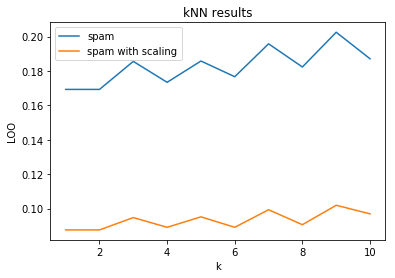

In [13]:
plt.clf()
plt.xlabel('k')
plt.ylabel('LOO')
plt.title('kNN results')
ks = list(range(1, 11))
plt.plot(ks, [results[1][1][k] for k in ks], label = 'spam')
plt.plot(ks, [results[3][1][k] for k in ks], label = 'spam with scaling')
plt.legend()
plt.show()

#### 3) (2) Implement the k-means algorithm and cluster data point into [2,3,4,5] clusters.

I will reuse function `get_k_nearest_indexes` from the previous task

Let's describe function to visualize out clustering. **It will be based on** the source of similar `sklearn` visualization.

In [224]:
def find_closest_point(point, points):
    return get_k_nearest_indexes(point, points, 1)[0]

In [225]:
def draw_clasters(centers, points, k):
    h = .02
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = np.array([find_closest_point(point, centers) for point in np.c_[xx.ravel(), yy.ravel()]]).reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(points[:, 0], points[:, 1], 'k.', markersize=2)
    # Plot the centroids as a white X
    centroids = centers
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('K-means clustering, k = {}'.format(k))
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [226]:
def get_init_k_means_centers(points, k):
    return points[np.random.choice(range(points.shape[0]), k, replace=False)]

In [227]:
def get_k_means_new_centers(centers, points):
    k = centers.shape[0]
    points_centers = np.array([find_closest_point(point, centers) for point in points]).reshape(points.shape[0])
    return np.array([np.mean(points[np.where(points_centers == ind),:].reshape(-1, 2), axis=0) for ind in range(k)])

In [228]:
def k_means(points, k):
    centers = get_init_k_means_centers(points, k)
    new_centers = get_k_means_new_centers(centers, points)
    while not np.allclose(centers, new_centers):
        centers = new_centers
        new_centers = get_k_means_new_centers(centers, points)
    return new_centers

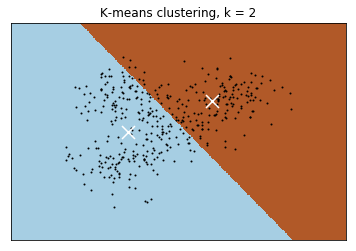

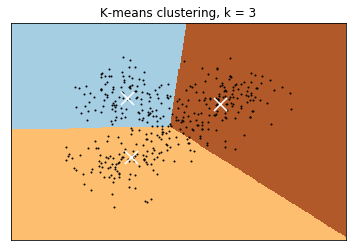

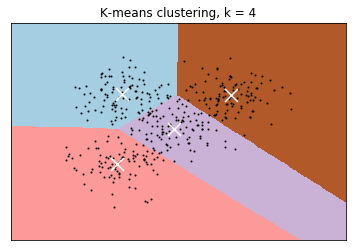

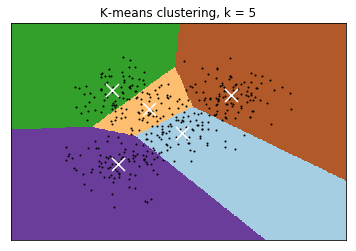

In [229]:
dataset_path = os.path.join(DATASETS_DIR, DATASETS[2])
points = load_csv_dataset(dataset_path, label_name=None).to_numpy()
for k in [2, 3, 4, 5]:
    centers = k_means(points, k)
    draw_clasters(centers, points, k)

#### 4) (2) Implement the DBSCAN algorithm and find parameters for clustering into [2,3,4,5] clusters.

At firts, let's describe function which splits points to clasters using DBSCAN

In our case, we have small enough dataset so we can use dfs instead of bfs without troubles with a stack

For visualization, we will also use a source of `sklearn` DBSCAN visualization.

In [321]:
def draw_clasters_DBSCAN(labels, core_samples, points):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    core_samples_mask = np.zeros((labels.shape[0]), dtype=bool)
    core_samples_mask[core_samples] = True
    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = points[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = points[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    if -1 in unique_labels:
        unique_labels.remove(-1)
    clasters_amount = len(unique_labels)
    plt.title('DBSCAN, %d clasters' % clasters_amount)
    plt.show()

In [333]:
def apply_DBSCAN(points, m, eps):
    n = points.shape[0]
    visited = np.zeros((n), dtype=bool)
    dist = lambda x, y: np.linalg.norm(x - y)
    dists = np.array([[dist(x, y) for y in points] for x in points])
    edges_mask = np.where(dists < eps, True, False)
    edges = [np.nonzero(edges_mask[ind])[0].reshape(-1) for ind in range(n)]
    
    def _dfs(current_point_ind):
        visited[current_point_ind] = True
        clusters[-1].append(current_point_ind)
        if (edges[current_point_ind].shape[0] < m):
            return
        
        for next_ind in edges[current_point_ind]:
            if not visited[next_ind]:
                _dfs(next_ind)
    
    clusters = []
    core_samples = [ind for ind in range(n) if len(edges[ind]) >= m]
    for ind in core_samples:
        if not visited[ind]:
            clusters.append([])
            _dfs(ind)
    
    labels = np.full((n), -1)
    for ind, cluster in enumerate(clusters):
        labels[cluster] = ind
    return np.array(labels), core_samples, len(clusters)

Let's find arguments for clustering in 2, 3, 4 and 5 clusters

In [336]:
clasterization = defaultdict(lambda:[])

dataset_path = os.path.join(DATASETS_DIR, DATASETS[2])
points = load_csv_dataset(dataset_path, label_name=None).to_numpy()

for m in tqdm(range(1, 20)):
    for eps in np.arange(0, 1, 0.1):
        labels, clusters, clasters_num = apply_DBSCAN(points, m, eps)
        clasterization[clasters_num].append((labels, clusters))

After it, I **manually** selected 'the best' clusterization (in my opinion)

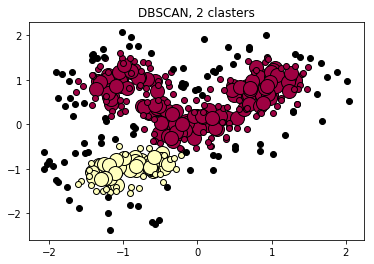

In [351]:
draw_clasters_DBSCAN(*clasterization[2][4], points)

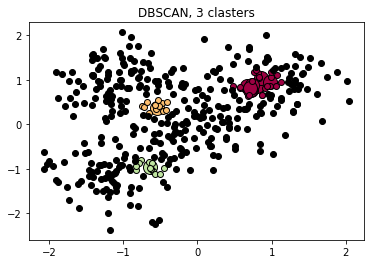

In [352]:
draw_clasters_DBSCAN(*clasterization[3][1], points)

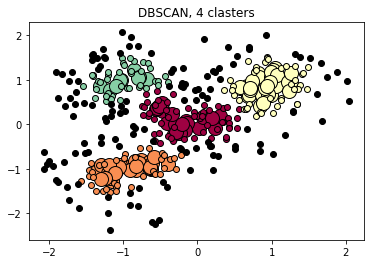

In [353]:
draw_clasters_DBSCAN(*clasterization[4][6], points)

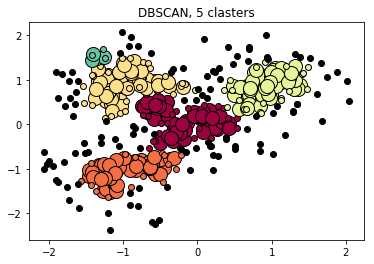

In [354]:
draw_clasters_DBSCAN(*clasterization[5][2], points)

In [ ]:
clasterization = defaultdict(lambda:[])

dataset_path = os.path.join(DATASETS_DIR, DATASETS[2])
points = load_csv_dataset(dataset_path, label_name=None).to_numpy()

for m in tqdm(range(1, 20)):
    for eps in np.arange(0, 1, 0.05):
        labels, clusters, clasters_num = apply_DBSCAN(points, m, eps)
        clasterization[clasters_num].append((labels, clusters))

In [ ]:
def apply_agglomerative_clustering(points, k):
    pass